In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import json


In [74]:
class Cycle():
  def __init__(self, points, edges):
    self.points = points
    self.edges = edges

class Instance():
  def __init__(self, name, cycle):
    self.name = name
    self.cycle = cycle

class Algorithm():
  def __init__(self, algorithm_type, instances):
    self.algorithm_type = algorithm_type
    self.instances = instances

f = open('sample.json')
 
data = json.load(f)


algorithms = []
for i in range(len(data['algorithm'])):
  algorithm_type = data['algorithm'][i]["type"]
  instances = []
  for j in range(len(data['algorithm'][i]['instance'])):
    name = data['algorithm'][i]['instance'][j]["name"]
    cycles = []
    for k in range(len(data['algorithm'][i]['instance'][j]["cycle"])):
      points = tuple(map(tuple, data['algorithm'][i]['instance'][j]["cycle"][k]["points"]))
      edges = tuple(map(tuple, data['algorithm'][i]['instance'][j]["cycle"][k]["edges"]))
      cycles.append(Cycle(points, edges))
    instances.append(Instance(name, cycles))
  algorithms.append(Algorithm(algorithm_type, instances))

# Closing file
f.close()

greedy
kroA100
((1, 2), (3, 5), (4, 8), (5, 0))


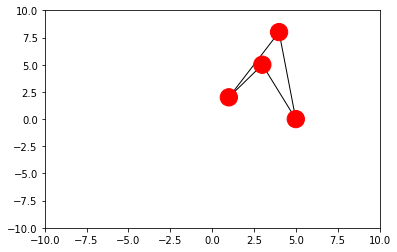

kroB100
((-1, -2), (-3, -5), (-4, -8), (-5, 0))


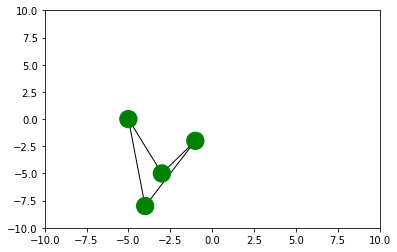

cycleExpansion
kroA100
((0, 5), (-3, 5), (0, 2), (-1, 0))


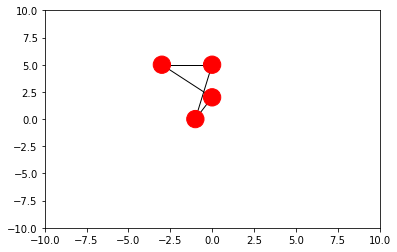

In [75]:

def add_edge_to_graph(G, e1, e2, w):
    G.add_edge(e1, e2, weight=w)

for i in range(len(algorithms)):
  print(algorithms[i].algorithm_type)
  algorithm_type = algorithms[i].algorithm_type
  for j in range(len(algorithms[i].instances)):
    print(algorithms[i].instances[j].name)
    name = algorithms[i].instances[j].name
    for k in range(len(algorithms[i].instances[j].cycle)):
      points = algorithms[i].instances[j].cycle[k].points
      edges = algorithms[i].instances[j].cycle[k].edges
      print(algorithms[i].instances[j].cycle[k].points)
      G = nx.Graph()
      for m in range(len(edges)):
        add_edge_to_graph(G, points[edges[m][0]], points[edges[m][1]], edges[m][2])

      pos = {point: point for point in points}

      color_map = ['red' if name == "kroA100" else 'green' for node in G]        

      fig, ax = plt.subplots()
      nx.draw(G, pos, node_color=color_map, ax=ax)
      # nx.draw(G, pos, node_size=250, ax=ax)  

      # nx.draw_networkx_labels(G, pos=pos) 
      # labels = nx.get_edge_attributes(G, 'weight')
      # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
      plt.axis("on")
      ax.set_xlim(-10, 10)
      ax.set_ylim(-10, 10)
      ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
      plt.show()

